# Last Week's Review

Before diving into this week's new material, we wanted to first take a step back and review what we learned last week since linear regression is a fundamental model within machine learning. We also wanted to go back and review some Tensorflow specifics.

Feedback: Thanks to all those who left feedback on last week's workshop! We did our best to carefully evaluate and see where we can improve. One of the main things we are trying out this workshop is to slow down with our explanations of code, have interactive coding sessions, and engage the audience more while lecturing in general. 

### Tensorflow Exercises

1) Import in Tensorflow (and alias it as tf) and Numpy (and alias it as np)

In [ ]:
import tensorflow as tf
import numpy as np

2) Create a Tensorflow session and name it sess

In [ ]:
sess = tf.InteractiveSession()

3) Create Tensorflow constants, model the expression 8 + (2*3), and print the output

In [ ]:
a = tf.constant(8.0)
b = tf.constant(2.0)
c = tf.constant(3.0)
d = tf.multiply(b, c) # shortcut is just b * c
e = tf.add(a, d)
print(sess.run(e))

4) When we're creating our weight matrix W, what type of Tensorflow object would we want to create? A placeholder, a constant, or a variable? Once you know the answer, create it below. We want it to be of size 10 x 1 and we want to initialize it with 0.01 everywhere.

In [ ]:
W = tf.Variable(tf.constant(0.01, shape=[10,1]))

5) What line(s) of code do we have to write to initialize our variables?

In [ ]:
init = tf.global_variables_initializer() 
sess.run(init)

6) Print the values of what is inside W.

In [ ]:
sess.run(W)

7) Use placeholders to create an operation that gives the sum of the values passed into the placeholders. Then, in a session, run this operation and pass in the values (4.0, 5.0) to the placeholders.

In [ ]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder = a + b
sess.run(adder, feed_dict = {a: 4.0, b: 5.0})

# Matplotlib Exercises

In machine learning, it's often useful to visualize our data before applying algorithms to do it. By understanding our dataset, we may gain additional insight into what methods may work or not work, understand which features are more important than others, and view the relationships of features to each other (in order to detect correlation of features). While visualizing high dimensional feature spaces is tricky, we can use Matplotlib to understand the basics of feature visualization.

In [ ]:
from matplotlib import pyplot as plt
X = np.linspace(0, 10, 100) # returns 100 evenly spaced numbers betweeen 0 and 100
cosines, sines = np.cos(X), np.sin(X)
plt.plot(X, cosines)
plt.plot(X, sines)
plt.show()

### Showing Bar Plots

In [ ]:
objects = ('Eat', 'Sleep', 'Code')
performance = [1,0,10]
 
plt.bar(range(len(performance)) , performance)
plt.xticks(range(len(performance)), objects)
plt.ylabel('Time')
plt.title('How much I spend time on things')
plt.show()

### Showing a picture (From scikit learn)

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
first_five_images = digits.images[:5]
# first_five_images holds 5 images. Each image is of dimension 8 * 8. 
# the enumerate keyword basically gives us the index and the value (in this case the image) at that index!
for i, image in enumerate(first_five_images):
    plt.subplot(1, 5, i + 1) # Plotting 1 row of NUM_FIGURES.
    plt.axis('off') # Uncomment this to plot with axes.
    plt.imshow(image, cmap=plt.cm.gray_r) # since MNIST is in grayscale.
plt.show()

### Review: Machine Learning Basics and Linear Regression

- We have a set of training pairs $$ (x_1, y_1), (x_2, y_2), ... (x_n, y_n) $$ which is our dataset. Examples include X being handwritten digits and y being the corresponding digit, X being a set of features that describe a house and y being the house price, or X being a set of restaurant reviews and y being the sentiment (positive or negative) of the review. 
- Computers can't work directly with the data in the same format that humans read it. For example, images are represented as a matrix of pixel values. Qualities describe a house (such as its neighborhood) are expressed numerically (by setting 1 = neighborhood1, 2 = neighborhood2, etc). 
- It's important to keep track of how you're representing your inputs! This should be done in a consistent manner so that it's easy to convert back and forth, and other users can understand your work.

### Crux of Supervised Machine Learning: Learning a function
- Given some data, we wish to learn a function that maps inputs to outputs. 
- If y is real-valued, we're dealing with a regression problem, otherwise we're dealing with a classification problem.
- Example to distinguish between the two: predicting the temperature tomorrow given weather data (real-valued outputs, regression problem) vs predicting whether it will rain tomorrow or not given weather data (discrete outputs, classification problem). 
- **Learning is about generalizing from the training data that we have.**

### Loss functions
- Given a function $ f: X \rightarrow Y $, we want to evaluate how well it is doing. 
- Example loss function: just take the squared difference: $ L_i = (f(x_i) - y_i)^2 $
- If we make predictions across the entire training set, we end up with a total loss $ L = \sum_{i = 1}^{N} L_i = \sum_{i = 1}^{N} (f(x_i) - y_i)^2 $
- Assumption: If we can minimize this loss, then we have learned a good function that can accurately predict inputs from outputs. 
    - Is this true? What are arguments for and against this assumption? Think about what we're really interested in with machine learning, and how the value of this loss relates to that. 

### Linear Regression
- Linear regression is one model that we can use when dealing with real-valued outputs. 
- Fundamental assumption: model our output ($y_i$) as a ** linear combination ** of our inputs. 
- Example: We want to learn a function $y_i = f(x_i) = wx_i$ where $ w $ is some parameter that we must come up with. We have the following dataset: $(1, 2.5), (2, 4.5), (5, 10.5)$. What is a sensible parameter choice for $w$? Given this parameter choice, what loss (using the sum of squared losses function given above) do you get? 

### Generalizing the idea of linear regression
- In general, each of our puts, $x$, will be a vector of features as opposed to a single numerical value. If each vector has size $n$, then we will need to learn a set of $n$ parameters, or weights - one for each feature. We also need a **bias unit**, which will allow our model to not necessarily have to pass through the origin, which is useful t fit data that does not pass through the origin. 
- Our function is now $f(x_i) = w_1*x_1 + w_2*x_2 + ... w_n*x_n = \sum_{i = 1}^{N}w_ix_i $. We can also compactly write this as a vector-vector multiplication where $W$ is our vector of weights and $x$ is our vector of features: $f(x_i) = Wx_i$.
- As you can probably guess, it is extremely impractical to set the weights manually! We were able to get a good approximation of the weight for the single dimension case, but in practice there can be up to millions of training examples and thousands of features. We want our machine learning model to learn the weights. 

### Learning a good setting of weight parameters
- Core idea: initialize the weights randomly. See how bad our loss is. Adjust our weights based on the value of our loss, and how much each weight affects it.
- We learn our weights with **gradient descent**: take partial derivatives of our loss with respect to our weights. This tells us the rate of change of the loss with respect to that particular weight, or how much that weight contributed to our loss. We adjust our weight based on this value. 
    

### From linear regression to classification
- By understanding linear regression, we've actually built up about 90% of the knowledge needed for classification problems. With classification, we no longer seek to predict real valued outputs from inputs, but instead seek to predict discrete values that represent classes. We start off with binary classification.
- Example: Given a bunch of dog and cat images, learn a function that outputs 0 for dogs and 1 for cats. 
- Given previous movies that a user has liked, predict whether a user will like another movie (0 for dislike, 1 for like). 
- Example: Given a dataset of handwritten digits, identify each digit. 
- Exercise: How does the last example differ from the previous ones?

### Binary Classification
- Binary classification is a simpler classification problem, but the concepts we learn allow us to generalize to multi-class classification extremely easily. 
- The setting is the same as any supervised learning problem: given a set of inputs and outputs, we wish to learn a function that maps inputs to outputs that generalizes well. The only difference from linear regression is that we don't want a real-valued output, but instead discrete outputs: 0 or 1. 
- We can create discrete outputs through using the **sigmoid** function. The sigmoid function $\sigma(x) = \frac{1}{1 + e^{-x}}$ takes in a real-valued $x$ and produces a value between 0 and 1. 
- We can interpret this result as a **probability**: the closer the value is to 1, the more sure we that our example belongs to class 1, and the closer the value is to 0, the more sure we are that our example belongs to class 0. 

### Exercises
- What is our prediction now given by? 
- How do we change our learning algorithm to accommodate the addition of $\sigma(x)$ to our prediction function $f$? 

### From Binary to Multi-Class Classification
- Sometimes, we don't want just binary outputs - we actually want to be able to distinguish between several classes. For example, if we're learning a function to recognize handwritten digits, we would want to classify each digit instead of just figuring out if this digit is a 0 or not. 
- This is called **multi-class** classification, and is a generalization of binary classification. 


In the context of our MNIST problem, we're interested in producing more than a binary classification - we want to predict one label out of a possible ten. One intuitive way of doing this is simply training several classifiers - a one classifier, a two classifier, and so on. We don't want to train multiple models separately though, we'd like a single model to learn all the possible different classifications. 

If we consider our basic model of a neuron, we see that it has one vector of weights that it applies to determine a label. What if we had multiple vectors - a matrix - of weights instead? Then, each row of weights could represent a separate classifier. To see this clearly, we can start off with a simple linear mapping: 

$$ a = W^{T}x + b $$

For our MNIST problem, x is a vector with 784 components, W was originally a single vector with 784 values, and the bias, b, was a single number. However, if we modified W to be a matrix instead, we get multiple rows of weights, each of which can be applied to the input x via a matrix multiplication. Since we want to be able to predict 10 different labels, we can let W be a 10 x 784 matrix, and the matrix product $Wx$ will produce a column vector of values that represent the output of 10 separate classifiers, where the weights for each classifier is given by the rows of W. The bias term is now a 10-dimensional vector that each add a bias term to matrix product. The core idea, however, is that this matrix of weights represent different classifiers, and now we can predict more than just binary labels. An image from Stanford's CS 231n course shows this clearly [3]:

![Multi-class classification](https://raw.githubusercontent.com/rohan-varma/rohan-blog/gh-pages/images/imagemap.jpg)

Now that we have a vector of outputs that roughly correspond to scores for each predicted class, we'd like to figure out the most likely label. To do this, we can map our 10 dimensional vector to another 10 dimensional vector which each value is in the range (0, 1), and the sum of all values is 1. This is known as the softmax function. We can use the output of this function to represent a probability distribution: each value gives us the probability of the input x mapping to a particular label y. The softmax function's input and output are both vectors, and it can be defined as $$\frac{e^{z_i}}{\sum_{i=1}^{N} e^{z_i}}$$


Next, we can use our loss function discussed previously to evaluate how well our classifier is doing. Specifically, we use the cross-entropy loss, which for a single prediction/label pair, is given by $ C(S,L) = - \sum_{i}L_{i}log(S_{i})$. 

Here, $L$ is a specific one-hot encoded label vector, meaning that it is a column vector that has a 1 at the index corresponding to its label, and is zero everywhere else. $S$ is a prediction vector whose elements sum to 1. As an example, we may have: 

$$L = \begin{bmatrix}
           1 \\
           0 \\
           0 
         \end{bmatrix}, S = \begin{bmatrix}
           0.2 \\
           0.7 \\
           0.1 
         \end{bmatrix} \longrightarrow{} C(S, L) = - \sum_{i=1}^{N}L_ilog(S_i) = -log(0.2) = 0.70 $$
         
The contribution to the entire training data's loss by this pair was 0.70. To contrast, we can swap the first two probabilities in our softmax vector. We then end up with a lower loss: 

$$L = \begin{bmatrix}
           1 \\
           0 \\
           0 
         \end{bmatrix}, S = \begin{bmatrix}
           0.7 \\
           0.2 \\
           0.1 
         \end{bmatrix} \longrightarrow{} C(S, L) = - \sum_{i=1}^{N}L_ilog(S_i) = -log(0.7) = 0.15 $$

So our cross-entropy loss makes intuitive sense: it is lower when our softmax vector has a high probability at the index of the true label, and it is higher when our probabilities indicate a wrong or uncertain choice. The average cross entropy loss is given by plugging into the average training loss function given above. A large part of training our neural network will be finding parameters that make the value of this function as small as possible, but still ensuring that our parameters generalize well to unseen data. For the linear softmax classifier, the training loss can be written as:

$$ L = - \frac{1}{N}\sum_{j} C( S(Wx_j + b), L_j)$$
         

This is the function that we seek to minimize. Using the gradient descent algorithm, we can learn a particular matrix of weights that performs well and produces a low training loss. The assumption is that a low trainin gloss will correspond to a low expected loss across all samples in the population of data, but this is a risky assumption that can lead to overfitting. Therefore, a lot of research into machine learning is directed towards figuring out how to minimize training loss while also retaining the ability to generalize.


### Coding a basic digit classifier


In [1]:
# Our usual imports
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

MNIST = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:

lr = .01 # the learning rate
batch_size = 128 # the number of examples we will consider per iterations
n_epochs = 2500 # the number of iterations we will do

# TODO: Create placeholders for X (our features) and Y (our labels)
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# TODO: create Variables for w (our weights) and b (our biases)
w = tf.Variable(tf.truncated_normal(shape = [784, 10], stddev=0.01), name = 'w')
b = tf.Variable(tf.zeros([1, 10]), name = 'b')

logits = tf.matmul(X, w) + b
normalized_logits = tf.nn.softmax(logits)
# TODO: write code to compute the cross_entropy_loss and the mean_squared_loss.
# Experiment with both losses: which one performs better? Why might this be?
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits))
mean_squared_loss = tf.reduce_mean(tf.square(Y - normalized_logits))
loss = mean_squared_loss
# TODO: Create a GradientDescentOptimizer that minimizes our loss. 
opt = tf.train.GradientDescentOptimizer(learning_rate = lr).minimize(loss)

# operations that help us monitour our accuracy
cp = tf.equal(tf.argmax(logits, axis = 1), tf.argmax(Y, axis = 1))
acc= tf.reduce_mean(tf.cast(cp, tf.float32))

# TODO: create a global_variables_initializer, launch the graph, and run the optimization step for n_epochs iterations.
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
for i in range(n_epochs):
    batch = MNIST.train.next_batch(batch_size)
    sess.run(opt, feed_dict = {X: batch[0], Y: batch[1]})
    if i % 500 == 0:
        l = loss.eval(feed_dict = {X: batch[0], Y: batch[1]})
        print("Loss: {}".format(l))
a = acc.eval(feed_dict = {X: MNIST.test.images, Y: MNIST.test.labels})
print("test acc: {}".format(a))


Loss: 0.09014946222305298
Loss: 0.08801271766424179
Loss: 0.08501389622688293
Loss: 0.08081179857254028
Loss: 0.07763171941041946
test acc: 0.656499981880188


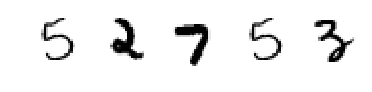

predicted 3, ground truth was 5
predicted 2, ground truth was 2
predicted 7, ground truth was 7
predicted 3, ground truth was 5
predicted 3, ground truth was 3


In [3]:
import matplotlib.pyplot as plt

def plot_images(images):
    for i in range(images.shape[0]):
        plt.subplot(1, 5, i + 1) # Plotting 1 row of NUM_FIGURES.
        plt.axis('off')
        plt.imshow(images[i].reshape((28,28)), cmap = plt.cm.gray_r)
    plt.show()
    
# TODO: Take some random images from the MNIST dataset, run a prediction, and display the prediction and the actual label.

NUM_IMAGES = 5
rand_image_idx = np.random.randint(0, MNIST.test.images.shape[1], NUM_IMAGES)
images, labels = [MNIST.test.images[i] for i in rand_image_idx], [MNIST.test.labels[i] for i in rand_image_idx]
images, labels = np.array(images), np.array(labels)
plot_images(images)
for i in range(images.shape[0]):
    prediction = sess.run(logits, feed_dict = {X: images[i].reshape((1, images[i].shape[0])), Y: labels[i].reshape((1, labels[i].shape[0]))})
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(labels[i])
    print("predicted {}, ground truth was {}".format(predicted_label, actual_label))